In [1]:
import pandas as pd



In [2]:
data = pd.read_csv('data/iris.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
X = data.iloc[:, :-1]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
from sklearn.cluster import KMeans

In [5]:
model = KMeans(n_clusters=3, random_state=10)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)

In [6]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [7]:
import matplotlib.pyplot as plt



Text(0, 0.5, 'petal width')

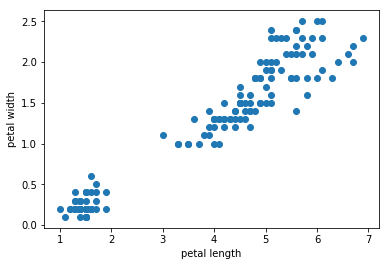

In [8]:
plt.scatter(X.petal_length, X.petal_width)
plt.xlabel('petal length')
plt.ylabel('petal width')

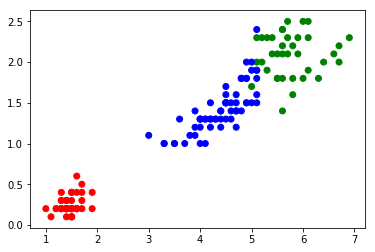

In [9]:
import numpy as np
color_scheme = np.array(['red', 'blue', 'green'])

plt.scatter(X.petal_length, X.petal_width, color=color_scheme[model.labels_])

In [10]:
color_scheme

array(['red', 'blue', 'green'], dtype='<U5')

In [11]:
color_scheme[model.labels_]

array(['red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'blue', 'blue', 'green', 'blue',
       'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue',
       'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue',
       'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'green',
       'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue',
       'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue',
       'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'green', 'blue',
       'green', 'green', 'green', 'green', 'blue', 'green', 'green',
       'green', 'green', 'green', 'green', 'blue', 'blue', 'green',
       'gr

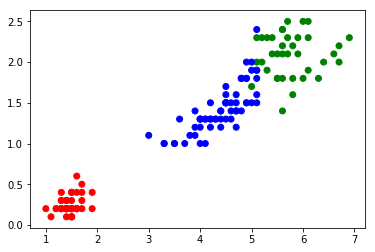

In [12]:
plt.scatter(X.petal_length, X.petal_width, color=color_scheme[model.labels_])

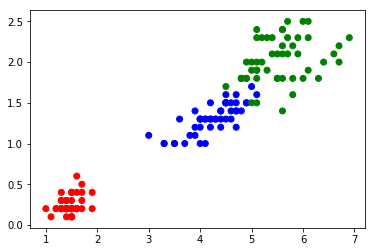

In [13]:
plt.scatter(X.petal_length, X.petal_width, color=color_scheme[data.target])

Text(209.74318181818177, 0.5, 'petal width')

<Figure size 432x288 with 0 Axes>

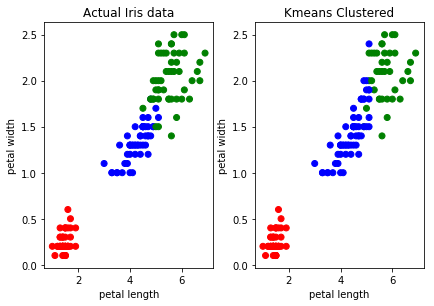

In [14]:
fig = plt.figure()
fig, ax = plt.subplots(1, 2)
plt.tight_layout()
ax[0].set_title('Actual Iris data')
ax[1].set_title('Kmeans Clustered')
ax[0].scatter(X.petal_length, X.petal_width, color=color_scheme[data.target])
ax[1].scatter(X.petal_length, X.petal_width, color=color_scheme[model.labels_])
ax[0].set_xlabel('petal length')
ax[0].set_ylabel('petal width')
ax[1].set_xlabel('petal length')
ax[1].set_ylabel('petal width')

In [24]:
from scipy.spatial.distance import cdist

distortions = []

K = range(1, 17)

for k in K:
    kmean_model = KMeans(n_clusters=k)
    kmean_model.fit(X)
    distortions.append(sum(np.min(cdist(X, kmean_model.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    
    

In [18]:
dir(kmean_model)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_test_data',
 '_estimator_type',
 '_get_param_names',
 '_transform',
 'algorithm',
 'cluster_centers_',
 'copy_x',
 'fit',
 'fit_predict',
 'fit_transform',
 'get_params',
 'inertia_',
 'init',
 'labels_',
 'max_iter',
 'n_clusters',
 'n_init',
 'n_iter_',
 'n_jobs',
 'precompute_distances',
 'predict',
 'random_state',
 'score',
 'set_params',
 'tol',
 'transform',
 'verbose']

In [25]:
distortions

[1.943034159037026,
 0.856027968244863,
 0.648839494895334,
 0.5581937771352218,
 0.5104611995137194,
 0.46587512238890827,
 0.44203211906259565,
 0.4116416469512751,
 0.3943854782859045,
 0.3846494670842009,
 0.37292758516803737,
 0.35850161133680125,
 0.347935394215674,
 0.3373709811685523,
 0.3320197983636793,
 0.31958558176844726]

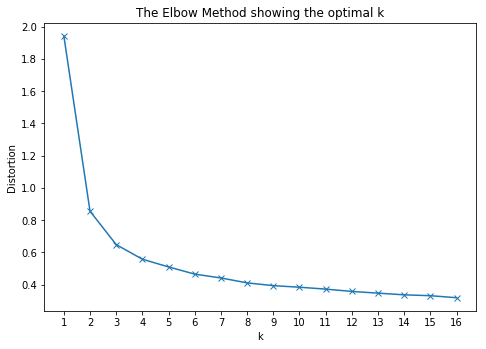

In [27]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticks(range(1, 25))
ax.set_xlabel('k')
ax.set_ylabel('Distortion')

ax.set_title('The Elbow Method showing the optimal k')
ax.plot(K, distortions, marker = 'x')

plt.show()